In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import tqdm
import shutil

In [327]:
os.chdir(r'D:\New folder')
df = pd.read_csv('all_answers.csv')
#dfe = pd.read_csv("experiment.csv")
#dfmg = pd.read_csv("model_gender.csv")
#dfmag = pd.read_csv('model_age.csv')
#dfmac = pd.read_csv('model_accent.csv')
# dfh1 = pd.read_csv('human1.csv')
# dfh2 = pd.read_csv('human2.csv')
# dfh2_1 = pd.read_csv('human2_1.csv')
# dfh3 = pd.read_csv('human3.csv')
# df2 = pd.read_csv("model_gender.csv")

In [4]:
# dfh2 = dfh2.append(dfh2_1)
# dfhT = dfh1.append(dfh2)
# dfh = dfhT.append(dfh3)
# df = pd.merge(dfe, dfh, on=['filename'])
# df = pd.merge(df,dfmag, on=["filename"])
# df = pd.merge(df, dfmg, on=['filename'])
# df = pd.merge(df,dfmac, on=["filename"])

#df = df = pd.merge(dfe, dfh, on=['filename'])pd.merge(df, dfh1, on=['filename'])

In [9]:
# df.to_csv('all_answers.csv', index=False)

In [331]:
df

filename  \
0    cv-valid-train/wav/sample-011366.wav   
1    cv-valid-train/wav/sample-177962.wav   
2    cv-valid-train/wav/sample-083093.wav   
3    cv-valid-train/wav/sample-093109.wav   
4    cv-valid-train/wav/sample-145605.wav   
..                                    ...   
617  cv-valid-train/wav/sample-054507.wav   
618  cv-valid-train/wav/sample-080012.wav   
619  cv-valid-train/wav/sample-000777.wav   
620  cv-valid-train/wav/sample-181734.wav   
621  cv-valid-train/wav/sample-113038.wav   

                                                  text  age  gender  accent  \
0                     always ask an objective question    1       0       1   
1    i remember how i sat on the table there in the...    3       0       1   
2    the two men hurried back and found the cylinde...    2       0       1   
3                but now the sounds inside had stopped    1       0       1   
4    it was dropping off in flakes and raining down...    3       0       1   
..                                                 ...  ...     ...     ...   
617  she was beautiful from behind but he couldn't ...    1       1       5   
618  i use it to track my personal to do list which...    2       0       5   
619  the guy thought he was a lunatic at large and ...    1       1       5   
620       there are rumors of tribal wars he told them    1       1       5   
621                   but you could bring them in here    2       0       5   

     H_age  H_gender  H_accent  M_age  M_gender  M_accent  H_age_correct  
0        2         0         4      2         1         2          False  
1        2         0         1      3         0         5          False  
2        2         0         1      2         0         1           True  
3        2         0         1      1         0         4          False  
4        2         0         1      3         0         4          False  
..     ...       ...       ...    ...       ...       ...            ...  
617      1         1         5      1         1         2           True  
618      2         0         5      2         0         5           True  
619      2         1         5      3         0         2          False  
620      1         1         3      1         1         3           True  
621      1         1         2      2         0         4          False  

[622 rows x 12 columns]

In [6]:
df.head(25)

filename  \
0   cv-valid-train/wav/sample-011366.wav   
1   cv-valid-train/wav/sample-177962.wav   
2   cv-valid-train/wav/sample-083093.wav   
3   cv-valid-train/wav/sample-093109.wav   
4   cv-valid-train/wav/sample-145605.wav   
5   cv-valid-train/wav/sample-185318.wav   
6   cv-valid-train/wav/sample-106445.wav   
7   cv-valid-train/wav/sample-190186.wav   
8   cv-valid-train/wav/sample-159112.wav   
9   cv-valid-train/wav/sample-077067.wav   
10  cv-valid-train/wav/sample-001153.wav   
11  cv-valid-train/wav/sample-115478.wav   
12  cv-valid-train/wav/sample-093880.wav   
13  cv-valid-train/wav/sample-082423.wav   
14  cv-valid-train/wav/sample-142739.wav   
15  cv-valid-train/wav/sample-131533.wav   
16  cv-valid-train/wav/sample-076355.wav   
17  cv-valid-train/wav/sample-112636.wav   
18  cv-valid-train/wav/sample-113781.wav   
19  cv-valid-train/wav/sample-105355.wav   
20  cv-valid-train/wav/sample-157801.wav   
21  cv-valid-train/wav/sample-151668.wav   
22  cv-valid-train/wav/sample-184932.wav   
23  cv-valid-train/wav/sample-156596.wav   
24  cv-valid-train/wav/sample-106730.wav   

                                                 text  age  gender  accent  \
0                    always ask an objective question    1       0       1   
1   i remember how i sat on the table there in the...    3       0       1   
2   the two men hurried back and found the cylinde...    2       0       1   
3               but now the sounds inside had stopped    1       0       1   
4   it was dropping off in flakes and raining down...    3       0       1   
5               shall we tell her what she looks like    1       1       1   
6                he was immensely excited at the news    1       0       1   
7                  i wished i had a light to smoke by    1       1       1   
8   we're refugees from the tribal wars and we nee...    3       0       1   
9   in any case it's good that you've learned that...    1       1       1   
10  the greatest authority on meteorites stated th...    3       0       1   
11        he got up early with the idea of finding it    2       1       1   
12                             you go on and practice    3       0       1   
13  when i returned to the common the sun was setting    1       1       1   
14  whatever the thing observed one could find a c...    1       0       1   
15  then you taught me something of the universal ...    3       0       1   
16            but don't worry the alchemist continued    2       0       1   
17               watch out for his venom the boy said    3       1       1   
18         but he knew that salem wasn't in andalusia    1       0       1   
19  sometimes it's better to be with the sheep who...    1       1       1   
20  he got up adjusted his clothing and picked up ...    2       0       1   
21  i have already described the appearance of tha...    2       0       1   
22  just teach me to be the wind for a few moments...    1       0       1   
23                  i find the other argument dubious    3       1       1   
24            the led monitor was cracked quite badly    1       1       1   

    H_age  H_gender  H_accent  M_age  M_gender  M_accent  
0       2         0         4      2         1         2  
1       2         0         1      3         0         5  
2       2         0         1      2         0         1  
3       2         0         1      1         0         4  
4       2         0         1      3         0         4  
5       1         1         1      2         1         4  
6       2         0         1      2         0         5  
7       2         1         1      1         1         5  
8       2         0         1      3         1         1  
9       1         1         1      2         1         4  
10      2         0         1      1         0         1  
11      2         0         1      3         0         1  
12      2         0         1      3         0         3  
13      1         1         1   

## Human bias

In [329]:
df.H_age.value_counts(True)

2    0.586817
1    0.284566
3    0.128617
Name: H_age, dtype: float64

In [13]:
df.H_gender.value_counts(True)

0    0.509646
1    0.490354
Name: H_gender, dtype: float64

In [14]:
df.H_accent.value_counts(True)

1    0.366559
3    0.276527
5    0.127010
4    0.118971
2    0.110932
Name: H_accent, dtype: float64

## Model bias

In [15]:
df.M_age.value_counts(True)

2    0.363344
3    0.358521
1    0.278135
Name: M_age, dtype: float64

In [16]:
df.M_gender.value_counts(True)

1    0.525723
0    0.474277
Name: M_gender, dtype: float64

In [17]:
df.M_accent.value_counts(True)

5    0.231511
3    0.231511
4    0.213826
2    0.188103
1    0.135048
Name: M_accent, dtype: float64

## Age


### Human

In [330]:
comparison_column = np.where(df["age"] == df["H_age"], True, False)
df["H_age_correct"] = comparison_column
df.H_age_correct.value_counts(True)

True     0.565916
False    0.434084
Name: H_age_correct, dtype: float64

### Model

In [332]:
comparison_column = np.where(df["age"] == df["M_age"], True, False)
df["M_age_correct"] = comparison_column
df.M_age_correct.value_counts(True)

True     0.565916
False    0.434084
Name: M_age_correct, dtype: float64

## Gender


### Human

In [333]:
comparison_column = np.where(df["gender"] == df["H_gender"], True, False)
df["H_gender_correct"] = comparison_column
df.H_gender_correct.value_counts(True)

True     0.966238
False    0.033762
Name: H_gender_correct, dtype: float64

### Model

In [334]:
comparison_column = np.where(df["gender"] == df["M_gender"], True, False)
df["M_gender_correct"] = comparison_column
df.M_gender_correct.value_counts(True)

True     0.882637
False    0.117363
Name: M_gender_correct, dtype: float64

## Accent

### Human

In [335]:
comparison_column = np.where(df["accent"] == df["H_accent"], True, False)
df["H_accent_correct"] = comparison_column
df.H_accent_correct.value_counts(True)

False    0.514469
True     0.485531
Name: H_accent_correct, dtype: float64

### Model

In [336]:
comparison_column = np.where(df["accent"] == df["M_accent"], True, False)
df["M_accent_correct"] = comparison_column
df.M_accent_correct.value_counts(True)

False    0.525723
True     0.474277
Name: M_accent_correct, dtype: float64

### All 3 parameters correct

In [338]:
df['Correct_M_age'] = np.where(df["age"] == df["M_age"], True, False)
df['Correct_M_gender'] = np.where(df["gender"] == df["M_gender"], True, False)
df['Correct_M_accent'] = np.where(df["accent"] == df["M_accent"], True, False)
df['Correct_M'] = np.where(np.logical_and(np.equal(df["Correct_M_gender"], True), np.equal(df["Correct_M_accent"], True)), True, False)
df['M_correct'] = np.where(np.logical_and(np.equal(df["Correct_M"], True), np.equal(df["Correct_M_age"], True)), True, False)
#df.Correct_M_accent.value_counts(True)
#df.Correct_M_age.value_counts(True)
#df.Correct_M_gender.value_counts(True)
df.M_correct.value_counts(True)

False    0.734727
True     0.265273
Name: M_correct, dtype: float64

In [339]:
df['Correct_H_age'] = np.where(df["age"] == df["H_age"], True, False)
df['Correct_H_gender'] = np.where(df["gender"] == df["H_gender"], True, False)
df['Correct_H_accent'] = np.where(df["accent"] == df["H_accent"], True, False)
df['Correct_H'] = np.where(np.logical_and(np.equal(df["Correct_H_gender"], True), np.equal(df["Correct_H_accent"], True)), True, False)
df['H_correct'] = np.where(np.logical_and(np.equal(df["Correct_H"], True), np.equal(df["Correct_H_age"], True)), True, False)
df.H_correct.value_counts().plot(kind='bar')

<AxesSubplot:>

In [491]:
def get_bar_plot(data1, data2, xlabel, ylabel, title, width, fontSize, xlim, normalisation):
    
    fig, ax = plt.subplots()
    cH = data1.value_counts(normalisation).sort_index()
    cM = data2.value_counts(normalisation).sort_index()
    cH.plot(kind='bar', position=0, width=width, ax=ax)
    cM.plot(kind='bar', color='red', position=1, width=width, ax=ax)
    if normalisation: 
        for p in ax.patches:
            ax.annotate(str(p.get_height())[2:4] + '.' + str(p.get_height())[4:6], (p.get_x() * 1, p.get_height()*1.005), fontsize=fontSize)
    else:
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()*1.005), fontsize=fontSize)

    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlim([-.5, xlim]) 
    plt.xticks(rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


### Plot for age

In [504]:
get_bar_plot(df.H_age, df.M_age, 'Age group', 'Percentage', 'Age distribution for answers', .25, 10, 2.5, True)
plt.savefig('plots/Age_dist.png')

### Plot for gender

In [502]:
get_bar_plot(df.H_gender, df.M_gender, 'Gender', 'Percentage', 'Gender distribution for answers', .3, 13, 2, True)
plt.savefig('plots/Gender_dist.png')

### Plot for accent

In [524]:
 get_bar_plot(df.H_accent, df.M_accent, 'Accent group', 'Percentage', 'Accent distribution for answers', .4, 10, 4.5, True)
plt.savefig('plots/Accent_dist.png')

In [499]:
get_bar_plot(df.H_correct, df.M_correct, '', 'Percentage', 'Distribution of answers with all 3 parameters correct', .4, 12, 1.5, False)

In [525]:
get_bar_plot(df.H_age_correct, df.M_age_correct, '', 'Percentage', 'Distribution of answers with correct age', .4, 12, 1.5, True)

In [526]:
get_bar_plot(df.H_gender_correct, df.M_gender_correct, '', 'Percentage', 'Distribution of answers with correct gender', .4, 12, 1.5, True)

In [527]:
get_bar_plot1(df.H_accent_correct, df.M_accent_correct, '', 'Percentage', 'Distribution of answers with correct age ', 1.5, True)

In [520]:
def get_bar_plot1(data1, data2, xlabel, ylabel, title, xlim, normalisation):
    
    fig, ax = plt.subplots()
    cH = data1.value_counts(normalisation).sort_index()
    cM = data2.value_counts(normalisation).sort_index()
    cH.plot(kind='bar', position=0, width=width, ax=ax)
    cM.plot(kind='bar', color='red', position=1, ax=ax)
    if normalisation: 
        for p in ax.patches:
            ax.annotate(str(p.get_height())[2:4] + '.' + str(p.get_height())[4:6], (p.get_x() * 1, p.get_height()*1.005))
    else:
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()*1.005))

    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlim([-.5, xlim]) 
    plt.xticks(rotation=0)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.title(title)


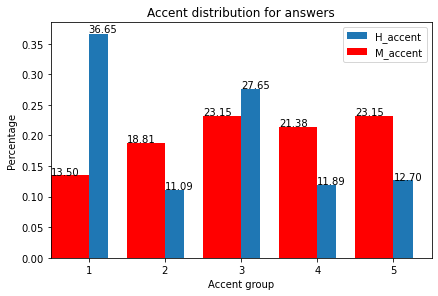

In [509]:
 get_bar_plot1(df.H_accent, df.M_accent, 'Accent group', 'Percentage', 'Accent distribution for answers', True)